<a href="https://colab.research.google.com/github/qkd8059/Capstone/blob/main/Back_Test_Nov25.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [1]:
! pip install dnspython
!pip install hmmlearn

     |████████████████████████████████| 215kB 6.4MB/s 
     |████████████████████████████████| 368kB 6.7MB/s 


In [1]:
from database_main import Database
from factor_main import *

             date   MKT   SMB   HML   RMW   CMA     RF
0      1963-07-09  0.45  0.00  0.10  0.14 -0.04  0.012
1      1963-08-13  0.27 -0.26 -0.03  0.05 -0.04  0.011
2      1963-08-12  0.24  0.20  0.41 -0.13  0.32  0.011
3      1963-08-16  0.15  0.07  0.10  0.04 -0.18  0.011
4      1963-10-04  0.00  0.03  0.06  0.00  0.16  0.013
...           ...   ...   ...   ...   ...   ...    ...
14407  2020-06-01  0.52  0.26  0.45 -0.04 -0.24  0.000
14408  2020-06-03  1.42  0.74  2.66  0.77  0.24  0.000
14409  2020-08-10  0.24  1.27  1.67  0.86  1.24  0.000
14410  2020-08-12  1.40 -0.81 -1.31  0.95 -0.14  0.000
14411  2020-08-13 -0.01 -0.12 -1.30 -0.63 -0.55  0.000

[14412 rows x 7 columns]
[['2005-09-30', 0.2, 0.24, -0.24, -0.41, 0.25, 0.014], ['2005-10-03', 0.0, 0.47, 0.0, -0.13, -0.06, 0.013], ['2005-10-04', -0.97, 0.14, -0.17, -0.48, 0.18, 0.013], ['2005-10-05', -1.63, -1.1, -0.2, -0.28, -0.17, 0.013], ['2005-10-06', -0.57, -0.42, 0.13, 0.03, -0.09, 0.013]]
[0.2, 0.0, -0.97, -1.63, -0.57]
[0.0, 

In [2]:
data = factors_fit.read_asset('SP500Price')
factors = RegimeSwitching.read_factor(start_date = '2005-09-30')
market_factor = RegimeSwitching.get_marketfactor(factors)
latent_state = RegimeSwitching.hmm_fit(np.array(market_factor).reshape(-1,1))
regimes = RegimeSwitching.thresholding_regime(latent_state, 5)
factors = RegimeSwitching.combine(factors,regimes)
price_table, return_matrix = factors_fit.asset_return(data)
[asset_return,factors_return,corresponding_regime] = factors_fit.factors_and_returns(return_matrix,factors)
excess_return = factors_fit.get_excess_return(asset_return,factors_return)

In [3]:
class regime_mapping(object):  
  def map_week_to_regime(corresponding_regime, back_test_min_length):
    week_number = [i+1 for i in range(len(corresponding_regime))]
    df = pd.DataFrame(data = corresponding_regime)
    df['Regime'] = pd.DataFrame(data = corresponding_regime)
    df['Week'] = week_number

    regime_ONE = []
    regime_ZERO = []
    temp = []
    for i in range(len(df)):
      if i>=back_test_min_length:
        #print(temp)
        temp = df[int(i-back_test_min_length):i+1]
        #print(temp)
        if all(elem == 1 for elem in temp['Regime']):
          regime_ONE.append(temp)
        if all(elem == 0 for elem in temp['Regime']):
          regime_ZERO.append(temp)
    return regime_ONE, regime_ZERO

  def get_all_zero_or_one(regime_one,regime_zero,corresponding_regime):
    week_number = [i+1 for i in range(len(corresponding_regime))]
    df = pd.DataFrame(data = corresponding_regime)

    df['Regime'] = pd.DataFrame(data = corresponding_regime)
    df['Week'] = week_number
    from datetime import datetime, timedelta
    from dateutil.parser import parse
    dates = []
    for i in range(len(week_number)):
      to_add = int(7*(i+1))
      dates.append(parse('2005-09-30') + timedelta(days=to_add))
    df['Date'] = dates
  # print(df[136:191])
  # print(df[542:629])
    return df[136:191],df[542:629]    

In [4]:
regime_one, regime_zero = regime_mapping.map_week_to_regime(corresponding_regime, back_test_min_length = 50)
all_regime_one, all_regime_zero = regime_mapping.get_all_zero_or_one(regime_one,regime_zero,corresponding_regime)

In [5]:
print(all_regime_one)
print(all_regime_zero)
# df['Regime'] = pd.DataFrame(data = corresponding_regime)
# df['Week'] = week_number
# print(df[136:191])
# print(df[542:629])

     0  Regime  Week       Date
136  1       1   137 2008-05-16
137  1       1   138 2008-05-23
138  1       1   139 2008-05-30
139  1       1   140 2008-06-06
140  1       1   141 2008-06-13
141  1       1   142 2008-06-20
142  1       1   143 2008-06-27
143  1       1   144 2008-07-04
144  1       1   145 2008-07-11
145  1       1   146 2008-07-18
146  1       1   147 2008-07-25
147  1       1   148 2008-08-01
148  1       1   149 2008-08-08
149  1       1   150 2008-08-15
150  1       1   151 2008-08-22
151  1       1   152 2008-08-29
152  1       1   153 2008-09-05
153  1       1   154 2008-09-12
154  1       1   155 2008-09-19
155  1       1   156 2008-09-26
156  1       1   157 2008-10-03
157  1       1   158 2008-10-10
158  1       1   159 2008-10-17
159  1       1   160 2008-10-24
160  1       1   161 2008-10-31
161  1       1   162 2008-11-07
162  1       1   163 2008-11-14
163  1       1   164 2008-11-21
164  1       1   165 2008-11-28
165  1       1   166 2008-12-05
166  1  

In [6]:
# weights = []
# ticker = []
# lookback = 16
# card=10
# for i in range(int(len(factors_return)/lookback)):
#   mu, Q = factors_fit.generate_factor(factors_return[0:(i+1)*lookback],excess_return[0:(i+1)*lookback])
#   weights.append(cvar(mu,Q,card, df, df.columns.values[(i+1)*lookback])[0])
#   ticker.append(cvar(mu,Q,card, df, df.columns.values[(i+1)*lookback])[1])
# print(len(weights))
# print(ticker)

In [3]:
from mvo import *
from mvo_cost import *
from cvar import *
from cvar_cost import *
from robust_cvar import *
from robust_cvar_cost import *
from max_sharpe import *
from max_sharpe_cost import *
from risk_parity import *
from risk_parity_cost import *

class optimization (object):
# card = 10
# regime_flag = 0
# regime_flag = 1
# model_flag = 0
# model_flag = 1
# model_flag = 2
# model_flag = 3
# model_flag = 4
# cost_flag = 0
# cost_flag = 1
# date = ['2010-10-15']
# price_table = df
  def cardinality (principal):
    if principal <= 10000:
      card = 5
    elif principal > 10000 and principal <= 100000:
      card = 10
    else: card = 12
    return card
  def choose_model (regime_flag):
    if regime_flag == 0:  #Robust CVaR for regime 0, bear market
      model_flag = 2
      cost_flag = 0    
    else:
      model_flag = 1    #CVaR for regime 1, bull market       
      cost_flag = 0
    return model_flag, cost_flag
  def get_weight (mu, Q, card, price_table, date, old_weight, old_ticker, model_flag, cost_flag):
    opt_model = [[mvo,mvo_cost],[cvar,cvar_cost],[robust_cvar,robust_cvar_cost],
                [max_sharpe, max_sharpe_cost],[risk_parity, risk_parity_cost]]
    if model_flag == 1 or model_flag == 2:
      if cost_flag == 0:
        weight, ticker_index = opt_model[model_flag][cost_flag](mu,Q,card,price_table,date)
      else:
        weight, ticker_index = opt_model[model_flag][cost_flag](mu,Q, card, price_table, date, old_weight, old_ticker)
    else:
      if cost_flag == 0:
        weight, ticker_index = opt_model[model_flag][cost_flag](mu,Q,card)
      else:
        weight, ticker_index = opt_model[model_flag][cost_flag](mu,Q, card, old_weight, old_ticker)
    return weight, ticker_index

  def multiperiod (factors_return, excess_return, df, lookback, principal,regime_flag):
    weight = []
    ticker_index = []
    mu_all = []
    card = optimization.cardinality(principal)
    model_flag, cost_flag = optimization.choose_model(regime_flag)
    #print(len(factors_return))
    if len(factors_return) % lookback != 0:
      factors_return = factors_return[:-int(len(factors_return) % lookback)]
    #print(len(factors_return))
    for i in range(int(len(factors_return)/lookback)):
      mu, Q = factors_fit.generate_factor(factors_return[0:(i+1)*lookback],excess_return[0:(i+1)*lookback])
      #print(len(Q))
      if i == 0:
        old_weight = np.zeros(card)
        old_ticker = np.arange(card)
      else:
        old_weight = weight[i-1]
        old_ticker = ticker_index[i-1]
      mu_all.append(mu)
      weight.append(optimization.get_weight(mu,Q,card, df, df.columns.values[(i+1)*lookback], old_weight, old_ticker, model_flag, cost_flag)[0])
      ticker_index.append(optimization.get_weight(mu,Q,card, df, df.columns.values[(i+1)*lookback], old_weight, old_ticker, model_flag, cost_flag)[1])
    return mu_all, weight, ticker_index

In [ ]:
# card = optimization.cardinality(20000)
# price_table = df
# date = ['2010-10-22']
# init_old_weight = np.zeros(card)
# init_old_ticker = np.arange(card)
# # m_f, c_f = optimization.choose_model(0)
# w, t = optimization.get_weight(card,price_table,date,init_old_weight, init_old_ticker, 4, 1)
# print(w,t)
mu_all, w,t = optimization.multiperiod (factors_return[136:191], excess_return[136:191], df=price_table, lookback = 16, principal = 20000, regime_flag = 0)
# print(w,t)

In [ ]:
### calculate the portfolio expected and actual return
lookback = 16
df = price_table
date_list = np.arange(0,df.shape[1],lookback)
def get_port_info (mu,Q,weight,ticker,date_list):
  all_weight = []
  all_ticker = []
  all_exp_return = []
  all_actual_return = []
  all_port_exp_ret = []
  all_port_act_ret = []
  for i in range(len(date_list)-2):
    cur_date = df.columns.values[date_list[i]]
    # exp_return = mu[ticker[i]]
    exp_return = mu[i][ticker[i]]
    actual_return = df.iloc[ticker[i],date_list[i+2]].values/df.iloc[ticker[i],date_list[i+1]].values
    port_exp_return = lookback*sum(weight[i]*exp_return)
    port_actual_return = sum(weight[i]*actual_return)-1
    all_weight.append(weight[i])
    all_ticker.append(ticker[i])
    all_exp_return.append(exp_return)
    all_actual_return.append(actual_return)
    all_port_exp_ret.append(port_exp_return)
    all_port_act_ret.append(port_actual_return)
  return all_weight, all_ticker, all_exp_return, all_actual_return, all_port_exp_ret, all_port_act_ret

### Calculate expected and actual cumulative return
def cum_return (port_ret):
  cal_ret_list = []
  cum_ret_list = []
  for i in range(len(port_ret)):
    cal_ret_list.append(port_ret[i]+1)
  ret = 1
  for num in cal_ret_list:
    ret = ret*num
    cum_ret_list.append(ret)
  return cum_ret_list

# calculate the mean difference between actual and expected return
def mean_diff (act_ret,exp_ret):
  diff_list = np.asarray(act_ret) - np.asarray(exp_ret)
  return diff_list.mean()

def sharpe_ratio (act_ret,exp_ret,rf):
  act_std = np.std(act_ret)
  exp_std = np.std(exp_ret)
  act_sr = (np.subtract(act_ret,rf))/act_std
  exp_sr = (np.subtract(exp_ret,rf))/exp_std
  return act_sr, exp_sr

In [8]:
from mvo import *
from mvo_cost import *
from cvar import *
from cvar_cost import *
from robust_cvar import *
from robust_cvar_cost import *
from max_sharpe import *
from max_sharpe_cost import *
from risk_parity import *
from risk_parity_cost import *

class backtest (object):
# card = 10
# regime_flag = 0
# regime_flag = 1
# model_flag = 0
# model_flag = 1
# model_flag = 2
# model_flag = 3
# model_flag = 4
# cost_flag = 0
# cost_flag = 1
# date = ['2010-10-15']
# price_table = df
  def cardinality (principal):
    if principal <= 10000:
      card = 5
    elif principal > 10000 and principal <= 100000:
      card = 10
    else: card = 12
    return card
  def choose_model (regime_flag):
    if regime_flag == 0:
      model_flag = 1
      cost_flag = 0
    else:
      model_flag = 1
      cost_flag = 1
    return model_flag, cost_flag
  def get_weight (mu, Q, card, price_table, date, old_weight, old_ticker, model_flag, cost_flag):
    opt_model = [[mvo,mvo_cost],[cvar,cvar_cost],[robust_cvar,robust_cvar_cost],
                [max_sharpe, max_sharpe_cost],[risk_parity, risk_parity_cost]]
    if model_flag == 1 or model_flag == 2:
      if cost_flag == 0:
        weight, ticker_index = opt_model[model_flag][cost_flag](mu,Q,card,price_table,date)
      else:
        weight, ticker_index = opt_model[model_flag][cost_flag](mu,Q, card, price_table, date, old_weight, old_ticker)
    else:
      if cost_flag == 0:
        weight, ticker_index = opt_model[model_flag][cost_flag](mu,Q,card)
      else:
        weight, ticker_index = opt_model[model_flag][cost_flag](mu,Q, card, old_weight, old_ticker)
    return weight, ticker_index

  def multiperiod (factors_return, excess_return, df, lookback, principal,regime_flag,model_flag, cost_flag):
    weight = []
    ticker_index = []
    mu_all = []
    card = optimization.cardinality(principal)
    #model_flag, cost_flag = optimization.choose_model(regime_flag)
    #print(len(factors_return))
    if len(factors_return) % lookback != 0:
      factors_return = factors_return[:-int(len(factors_return) % lookback)]
    #print(len(factors_return))
    for i in range(int(len(factors_return)/lookback)):
      mu, Q = factors_fit.generate_factor(factors_return[0:(i+1)*lookback],excess_return[0:(i+1)*lookback])
      #print(len(Q))
      if i == 0:
        old_weight = np.zeros(card)
        old_ticker = np.arange(card)
      else:
        old_weight = weight[i-1]
        old_ticker = ticker_index[i-1]
      mu_all.append(mu)
      weight.append(optimization.get_weight(mu,Q,card, df, df.columns.values[(i+1)*lookback], old_weight, old_ticker, model_flag, cost_flag)[0])
      ticker_index.append(optimization.get_weight(mu,Q,card, df, df.columns.values[(i+1)*lookback], old_weight, old_ticker, model_flag, cost_flag)[1])
    return mu_all, weight, ticker_index
  
  def get_port_info (mu,Q,weight,ticker,date_list):
    all_weight = []
    all_ticker = []
    all_exp_return = []
    all_actual_return = []
    all_port_exp_ret = []
    all_port_act_ret = []
    for i in range(len(date_list)-2):
      cur_date = df.columns.values[date_list[i]]
      # exp_return = mu[ticker[i]]
      exp_return = mu[i][ticker[i]]
      actual_return = df.iloc[ticker[i],date_list[i+2]].values/df.iloc[ticker[i],date_list[i+1]].values
      port_exp_return = lookback*sum(weight[i]*exp_return)
      port_actual_return = sum(weight[i]*actual_return)-1
      all_weight.append(weight[i])
      all_ticker.append(ticker[i])
      all_exp_return.append(exp_return)
      all_actual_return.append(actual_return)
      all_port_exp_ret.append(port_exp_return)
      all_port_act_ret.append(port_actual_return)
    return all_weight, all_ticker, all_exp_return, all_actual_return, all_port_exp_ret, all_port_act_ret

  ### Calculate expected and actual cumulative return
  def cum_return (port_ret):
    cal_ret_list = []
    cum_ret_list = []
    for i in range(len(port_ret)):
      cal_ret_list.append(port_ret[i]+1)
    ret = 1
    for num in cal_ret_list:
      ret = ret*num
      cum_ret_list.append(ret)
    return cum_ret_list

  # calculate the mean difference between actual and expected return
  def mean_diff (act_ret,exp_ret):
    diff_list = np.asarray(act_ret) - np.asarray(exp_ret)
    return diff_list.mean()

  def sharpe_ratio (act_ret,exp_ret,rf):
    act_std = np.std(act_ret)
    exp_std = np.std(exp_ret)
    act_sr = (np.subtract(act_ret,rf))/act_std
    exp_sr = (np.subtract(exp_ret,rf))/exp_std
    return act_sr, exp_sr

  def get_cum_ret(date_list,model_flag,lookback):
    cost_flag = 0
    mu_all, w, t = backtest.multiperiod (factors_return[136:191], excess_return[136:191], df=price_table, lookback = lookback, principal = 20000,regime_flag = 0,model_flag = model_flag, cost_flag = 0)
    #print(mu_all[1][t[1]])
    all_weight, all_ticker, all_exp_return, all_actual_return, all_port_exp_ret, all_port_act_ret = backtest.get_port_info (mu=mu_all,Q=None,weight=w,ticker=t,date_list=date_list)
    # mu_all[0][ticker[1]]
    # print(all_port_act_ret)
    cum_ret_exp = backtest.cum_return(all_port_exp_ret)
    cum_ret_act = backtest.cum_return(all_port_act_ret)
    return cum_ret_exp,cum_ret_act

#Bear Market Back-Testing （No Transaction Cost)


In [9]:
#with no transaction cost
lookback = 4
df = price_table
date_list = np.arange(136,191,lookback)
rCVAR_cum_ret_exp,rCVAR_cum_ret_act=backtest.get_cum_ret(date_list,2,lookback)
print("Robust CVAR DONE")
CVAR_cum_ret_exp,CVAR_cum_ret_act=backtest.get_cum_ret(date_list,1,lookback)
print("CVAR DONE")
MVO_cum_ret_exp,MVO_cum_ret_act=backtest.get_cum_ret(date_list,0,lookback)
print("MVO DONE")
Sharpe_cum_ret_exp,Sharpe_cum_ret_act=backtest.get_cum_ret(date_list,3,lookback)
print("Sharpe DONE")
RP_cum_ret_exp,RP_cum_ret_act=backtest.get_cum_ret(date_list,4,lookback)
print("RP DONE")

Robust CVAR DONE
CVAR DONE
     pcost       dcost       gap    pres   dres
 0:  5.3068e-04 -2.0843e+02  1e+03  3e+00  4e-15
 1:  9.1988e-04 -9.5246e+01  1e+02  3e-02  8e-15
 2:  1.1602e-03 -1.8946e+00  2e+00  3e-04  4e-15
 3:  1.1491e-03 -3.6824e-02  4e-02  5e-06  6e-15
 4:  8.1822e-04 -1.4340e-02  2e-02  2e-06  2e-15
 5:  2.5068e-04 -8.9268e-03  9e-03  3e-16  4e-17
 6:  1.9215e-04 -1.5080e-03  2e-03  6e-16  4e-17
 7:  9.2690e-05 -1.3340e-03  1e-03  2e-16  2e-17
 8:  4.6625e-05 -4.6484e-04  5e-04  3e-16  9e-18
 9:  9.2439e-06 -1.9456e-04  2e-04  2e-16  6e-18
10: -9.5529e-06 -1.8839e-04  2e-04  7e-16  6e-18
11: -2.0949e-05 -8.3538e-05  6e-05  4e-16  4e-18
12: -2.8347e-05 -7.1590e-05  4e-05  2e-16  4e-18
13: -3.4420e-05 -4.7432e-05  1e-05  4e-16  4e-18
14: -3.4937e-05 -4.5957e-05  1e-05  2e-16  4e-18
15: -3.7392e-05 -3.9925e-05  3e-06  2e-16  4e-18
16: -3.8185e-05 -3.8535e-05  3e-07  6e-16  4e-18
17: -3.8334e-05 -3.8339e-05  4e-09  7e-16  4e-18
Optimal solution found.
     pcost       dc

In [10]:
MVO_cum_ret_act.insert(0,1)
rCVAR_cum_ret_act.insert(0,1)
CVAR_cum_ret_act.insert(0,1)
Sharpe_cum_ret_act.insert(0,1)
RP_cum_ret_act.insert(0,1)


In [10]:
!pip install yfinance

     |████████████████████████████████| 5.5MB 7.1MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.55-py2.py3-none-any.whl size=22618 sha256=4a7f6dcd25236367a2f81f99d1a7d4aee419a03dbcf5d77a783fed31af949fe1
  Stored in directory: /root/.cache/pip/wheels/04/98/cc/2702a4242d60bdc14f48b4557c427ded1fe92aedf257d4565c
Successfully built yfinance
  Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [11]:
import yfinance as yf
start_date = '2008-05-16'
end_date = '2009-05-29'
data = yf.download("SPY", start=start_date, end=end_date)
print(data[:]['Adj Close'])
SPY_price = data[:]['Adj Close']
SPY_price = SPY_price[0:len(SPY_price):19]
SPY_return = SPY_price.pct_change().dropna()
SPY_return = SPY_return.values.tolist()
SPY_act_return = []
base = 1
for i in range(len(SPY_return)):
  if i == 0:
    SPY_act_return.append(base)
  else:
    SPY_act_return.append(SPY_act_return[i-1]*(1+SPY_return[i]))
#print(SPY_act_return)

[*********************100%***********************]  1 of 1 completed
Date
2008-05-16    110.443260
2008-05-19    110.745155
2008-05-20    109.847153
2008-05-21    107.989105
2008-05-22    108.004593
                 ...    
2009-05-21     70.881454
2009-05-22     70.730476
2009-05-26     72.542015
2009-05-27     71.246948
2009-05-28     72.240112
Name: Adj Close, Length: 260, dtype: float64


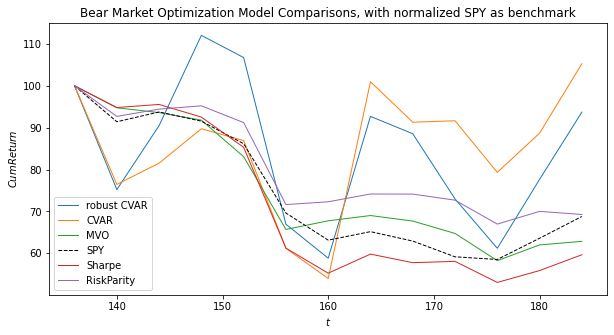

In [13]:
# fig, ax = plt.subplots()
# loc = plticker.MultipleLocator(base=90) # this locator puts ticks at regular intervals
# ax.xaxis.set_major_locator(loc)
# # y = np.sin(x)
# ax.plot(date_list[:-2],np.asarray(cum_ret_act)*100-100)
# print(date_list)
# ax.set_xlabel('Date')
# ax.set_ylabel('Return (%)')
# ax.set_title('Cumulative Portfolio Return')
# ax.legend(['Cumulated Actual Return'])
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,5))
plt.plot(date_list[:-1], np.asarray(rCVAR_cum_ret_act)*100, linewidth=1)    #Using 95% VaR, 1000 times simulation, theta = 1.96
plt.plot(date_list[:-1], np.asarray(CVAR_cum_ret_act)*100, linewidth=1)     #Using 95% VaR, 1000 times simulation,
plt.plot(date_list[:-1], np.asarray(MVO_cum_ret_act)*100, linewidth=1)
plt.plot(date_list[:-1],np.asarray(SPY_act_return)*100, 'k--',linewidth = 1)    #Use SPY, a S&P 500 tracking ETF as benchmark
plt.plot(date_list[:-1], np.asarray(Sharpe_cum_ret_act)*100, linewidth=1)
plt.plot(date_list[:-1], np.asarray(RP_cum_ret_act)*100, linewidth=1)
plt.legend(['robust CVAR','CVAR','MVO','SPY','Sharpe','RiskParity'])
plt.xlabel('$t$')
plt.ylabel('$Cum Return$')
plt.title('Bear Market Optimization Model Comparisons, with normalized SPY as benchmark')
plt.show()

#Bear Market Back-Testing (Yes Transaction Cost)

In [7]:
from mvo import *
from mvo_cost import *
from cvar import *
from cvar_cost import *
from robust_cvar import *
from robust_cvar_cost import *
from max_sharpe import *
from max_sharpe_cost import *
from risk_parity import *
from risk_parity_cost import *

class backtest (object):
# card = 10
# regime_flag = 0
# regime_flag = 1
# model_flag = 0
# model_flag = 1
# model_flag = 2
# model_flag = 3
# model_flag = 4
# cost_flag = 0
# cost_flag = 1
# date = ['2010-10-15']
# price_table = df
  def cardinality (principal):
    if principal <= 10000:
      card = 5
    elif principal > 10000 and principal <= 100000:
      card = 10
    else: card = 12
    return card
  def choose_model (regime_flag):
    if regime_flag == 0:
      model_flag = 1
      cost_flag = 0
    else:
      model_flag = 1
      cost_flag = 1
    return model_flag, cost_flag
  def get_weight (mu, Q, card, price_table, date, old_weight, old_ticker, model_flag, cost_flag):
    opt_model = [[mvo,mvo_cost],[cvar,cvar_cost],[robust_cvar,robust_cvar_cost],
                [max_sharpe, max_sharpe_cost],[risk_parity, risk_parity_cost]]
    if model_flag == 1 or model_flag == 2:
      if cost_flag == 0:
        weight, ticker_index = opt_model[model_flag][cost_flag](mu,Q,card,price_table,date)
      else:
        weight, ticker_index = opt_model[model_flag][cost_flag](mu,Q, card, price_table, date, old_weight, old_ticker)
    else:
      if cost_flag == 0:
        weight, ticker_index = opt_model[model_flag][cost_flag](mu,Q,card)
      else:
        weight, ticker_index = opt_model[model_flag][cost_flag](mu,Q, card, old_weight, old_ticker)
    return weight, ticker_index

  def multiperiod (factors_return, excess_return, df, lookback, principal,regime_flag,model_flag, cost_flag):
    weight = []
    ticker_index = []
    mu_all = []
    card = backtest.cardinality(principal)
    #model_flag, cost_flag = optimization.choose_model(regime_flag)
    #print(len(factors_return))
    if len(factors_return) % lookback != 0:
      factors_return = factors_return[:-int(len(factors_return) % lookback)]
    #print(len(factors_return))
    for i in range(int(len(factors_return)/lookback)):
      mu, Q = factors_fit.generate_factor(factors_return[0:(i+1)*lookback],excess_return[0:(i+1)*lookback])
      #print(len(Q))
      if i == 0:
        old_weight = np.zeros(card)
        old_ticker = np.arange(card)
      else:
        old_weight = weight[i-1]
        old_ticker = ticker_index[i-1]
      mu_all.append(mu)
      weight.append(backtest.get_weight(mu,Q,card, df, df.columns.values[(i+1)*lookback], old_weight, old_ticker, model_flag, cost_flag)[0])
      ticker_index.append(backtest.get_weight(mu,Q,card, df, df.columns.values[(i+1)*lookback], old_weight, old_ticker, model_flag, cost_flag)[1])
    return mu_all, weight, ticker_index
  
  def get_port_info (mu,Q,weight,ticker,date_list):
    all_weight = []
    all_ticker = []
    all_exp_return = []
    all_actual_return = []
    all_port_exp_ret = []
    all_port_act_ret = []
    for i in range(len(date_list)-2):
      cur_date = df.columns.values[date_list[i]]
      # exp_return = mu[ticker[i]]
      exp_return = mu[i][ticker[i]]
      actual_return = df.iloc[ticker[i],date_list[i+2]].values/df.iloc[ticker[i],date_list[i+1]].values
      port_exp_return = lookback*sum(weight[i]*exp_return)
      port_actual_return = sum(weight[i]*actual_return)-1
      all_weight.append(weight[i])
      all_ticker.append(ticker[i])
      all_exp_return.append(exp_return)
      all_actual_return.append(actual_return)
      all_port_exp_ret.append(port_exp_return)
      all_port_act_ret.append(port_actual_return)
    return all_weight, all_ticker, all_exp_return, all_actual_return, all_port_exp_ret, all_port_act_ret

  ### Calculate expected and actual cumulative return
  def cum_return (port_ret):
    cal_ret_list = []
    cum_ret_list = []
    for i in range(len(port_ret)):
      cal_ret_list.append(port_ret[i]+1)
    ret = 1
    for num in cal_ret_list:
      ret = ret*num
      cum_ret_list.append(ret)
    return cum_ret_list

  # calculate the mean difference between actual and expected return
  def mean_diff (act_ret,exp_ret):
    diff_list = np.asarray(act_ret) - np.asarray(exp_ret)
    return diff_list.mean()

  def sharpe_ratio (act_ret,exp_ret,rf):
    act_std = np.std(act_ret)
    exp_std = np.std(exp_ret)
    act_sr = (np.subtract(act_ret,rf))/act_std
    exp_sr = (np.subtract(exp_ret,rf))/exp_std
    return act_sr, exp_sr

  def get_cum_ret(date_list,model_flag,lookback):
    cost_flag = 0
    mu_all, w, t = backtest.multiperiod (factors_return[136:191], excess_return[136:191], df=price_table, lookback = lookback, principal = 20000,regime_flag = 0,model_flag = model_flag, cost_flag = 1)
    #print(mu_all[1][t[1]])
    all_weight, all_ticker, all_exp_return, all_actual_return, all_port_exp_ret, all_port_act_ret = backtest.get_port_info (mu=mu_all,Q=None,weight=w,ticker=t,date_list=date_list)
    # mu_all[0][ticker[1]]
    # print(all_port_act_ret)
    cum_ret_exp = backtest.cum_return(all_port_exp_ret)
    cum_ret_act = backtest.cum_return(all_port_act_ret)
    return cum_ret_exp,cum_ret_act

In [8]:
#with transaction cost
lookback = 4
df = price_table
date_list = np.arange(136,191,lookback)
print("Fitting Start")
rCVAR_cum_ret_exp,rCVAR_cum_ret_act=backtest.get_cum_ret(date_list,2,lookback)
print("Robust CVAR DONE")
CVAR_cum_ret_exp,CVAR_cum_ret_act=backtest.get_cum_ret(date_list,1,lookback)
print("CVAR DONE")
MVO_cum_ret_exp,MVO_cum_ret_act=backtest.get_cum_ret(date_list,0,lookback)
print("MVO DONE")
# Sharpe_cum_ret_exp,Sharpe_cum_ret_act=backtest.get_cum_ret(date_list,3,lookback)
# print("Sharpe DONE")
# RP_cum_ret_exp,RP_cum_ret_act=backtest.get_cum_ret(date_list,4,lookback)
# print("RP DONE")
MVO_cum_ret_act.insert(0,1)
rCVAR_cum_ret_act.insert(0,1)
CVAR_cum_ret_act.insert(0,1)
# Sharpe_cum_ret_act.insert(0,1)
# RP_cum_ret_act.insert(0,1)

Fitting Start
Robust CVAR DONE
CVAR DONE
MVO DONE


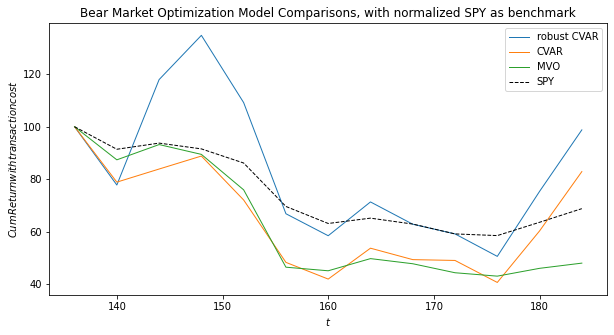

In [12]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,5))
plt.plot(date_list[:-1], np.asarray(rCVAR_cum_ret_act)*100, linewidth=1)    #Using 95% VaR, 1000 times simulation, theta = 1.96
plt.plot(date_list[:-1], np.asarray(CVAR_cum_ret_act)*100, linewidth=1)     #Using 95% VaR, 1000 times simulation,
plt.plot(date_list[:-1], np.asarray(MVO_cum_ret_act)*100, linewidth=1)
plt.plot(date_list[:-1],np.asarray(SPY_act_return)*100, 'k--',linewidth = 1)    #Use SPY, a S&P 500 tracking ETF as benchmark
# plt.plot(date_list[:-1], np.asarray(Sharpe_cum_ret_act)*100, linewidth=1)
# plt.plot(date_list[:-1], np.asarray(RP_cum_ret_act)*100, linewidth=1)
plt.legend(['robust CVAR','CVAR','MVO','SPY'])
plt.xlabel('$t$')
plt.ylabel('$Cum Return with transaction cost$')
plt.title('Bear Market Optimization Model Comparisons, with normalized SPY as benchmark')
plt.show()

#Bull-Market Optimization Model Comparisons, NO transaction cost

In [ ]:
from mvo import *
from mvo_cost import *
from cvar import *
from cvar_cost import *
from robust_cvar import *
from robust_cvar_cost import *
from max_sharpe import *
from max_sharpe_cost import *
from risk_parity import *
from risk_parity_cost import *

class backtest_bull (object):
# card = 10
# regime_flag = 0
# regime_flag = 1
# model_flag = 0
# model_flag = 1
# model_flag = 2
# model_flag = 3
# model_flag = 4
# cost_flag = 0
# cost_flag = 1
# date = ['2010-10-15']
# price_table = df
  def cardinality (principal):
    if principal <= 10000:
      card = 5
    elif principal > 10000 and principal <= 100000:
      card = 10
    else: card = 12
    return card
  def choose_model (regime_flag):
    if regime_flag == 0:
      model_flag = 1
      cost_flag = 0
    else:
      model_flag = 1
      cost_flag = 1
    return model_flag, cost_flag
  def get_weight (mu, Q, card, price_table, date, old_weight, old_ticker, model_flag, cost_flag):
    opt_model = [[mvo,mvo_cost],[cvar,cvar_cost],[robust_cvar,robust_cvar_cost],
                [max_sharpe, max_sharpe_cost],[risk_parity, risk_parity_cost]]
    if model_flag == 1 or model_flag == 2:
      if cost_flag == 0:
        weight, ticker_index = opt_model[model_flag][cost_flag](mu,Q,card,price_table,date)
      else:
        weight, ticker_index = opt_model[model_flag][cost_flag](mu,Q, card, price_table, date, old_weight, old_ticker)
    else:
      if cost_flag == 0:
        weight, ticker_index = opt_model[model_flag][cost_flag](mu,Q,card)
      else:
        weight, ticker_index = opt_model[model_flag][cost_flag](mu,Q, card, old_weight, old_ticker)
    return weight, ticker_index

  def multiperiod (factors_return, excess_return, df, lookback, principal,regime_flag,model_flag, cost_flag):
    weight = []
    ticker_index = []
    mu_all = []
    card = optimization.cardinality(principal)
    #model_flag, cost_flag = optimization.choose_model(regime_flag)
    #print(len(factors_return))
    if len(factors_return) % lookback != 0:
      factors_return = factors_return[:-int(len(factors_return) % lookback)]
    #print(len(factors_return))
    for i in range(int(len(factors_return)/lookback)):
      mu, Q = factors_fit.generate_factor(factors_return[0:(i+1)*lookback],excess_return[0:(i+1)*lookback])
      print(len(Q))
      if i == 0:
        old_weight = np.zeros(card)
        old_ticker = np.arange(card)
      else:
        old_weight = weight[i-1]
        old_ticker = ticker_index[i-1]
      mu_all.append(mu)
      weight.append(optimization.get_weight(mu,Q,card, df, df.columns.values[(i+1)*lookback], old_weight, old_ticker, model_flag, cost_flag)[0])
      ticker_index.append(optimization.get_weight(mu,Q,card, df, df.columns.values[(i+1)*lookback], old_weight, old_ticker, model_flag, cost_flag)[1])
    return mu_all, weight, ticker_index
  
  def get_port_info (mu,Q,weight,ticker,date_list):
    all_weight = []
    all_ticker = []
    all_exp_return = []
    all_actual_return = []
    all_port_exp_ret = []
    all_port_act_ret = []
    for i in range(len(date_list)-2):
      cur_date = df.columns.values[date_list[i]]
      # exp_return = mu[ticker[i]]
      exp_return = mu[i][ticker[i]]
      actual_return = df.iloc[ticker[i],date_list[i+2]].values/df.iloc[ticker[i],date_list[i+1]].values
      port_exp_return = lookback*sum(weight[i]*exp_return)
      port_actual_return = sum(weight[i]*actual_return)-1
      all_weight.append(weight[i])
      all_ticker.append(ticker[i])
      all_exp_return.append(exp_return)
      all_actual_return.append(actual_return)
      all_port_exp_ret.append(port_exp_return)
      all_port_act_ret.append(port_actual_return)
    return all_weight, all_ticker, all_exp_return, all_actual_return, all_port_exp_ret, all_port_act_ret

  ### Calculate expected and actual cumulative return
  def cum_return (port_ret):
    cal_ret_list = []
    cum_ret_list = []
    for i in range(len(port_ret)):
      cal_ret_list.append(port_ret[i]+1)
    ret = 1
    for num in cal_ret_list:
      ret = ret*num
      cum_ret_list.append(ret)
    return cum_ret_list

  # calculate the mean difference between actual and expected return
  def mean_diff (act_ret,exp_ret):
    diff_list = np.asarray(act_ret) - np.asarray(exp_ret)
    return diff_list.mean()

  def sharpe_ratio (act_ret,exp_ret,rf):
    act_std = np.std(act_ret)
    exp_std = np.std(exp_ret)
    act_sr = (np.subtract(act_ret,rf))/act_std
    exp_sr = (np.subtract(exp_ret,rf))/exp_std
    return act_sr, exp_sr

  def get_cum_ret(date_list,model_flag,lookback):
    cost_flag = 0
    mu_all, w, t = backtest_bull.multiperiod (factors_return[542:629], excess_return[542:629], df=price_table, lookback = lookback, principal = 20000,regime_flag = 0,model_flag = model_flag, cost_flag = 0)
    #print(mu_all[1][t[1]])
    all_weight, all_ticker, all_exp_return, all_actual_return, all_port_exp_ret, all_port_act_ret = backtest_bull.get_port_info (mu=mu_all,Q=None,weight=w,ticker=t,date_list=date_list)
    # mu_all[0][ticker[1]]
    # print(all_port_act_ret)
    cum_ret_exp = backtest_bull.cum_return(all_port_exp_ret)
    cum_ret_act = backtest_bull.cum_return(all_port_act_ret)
    return cum_ret_exp,cum_ret_act

In [ ]:
lookback = 5
df = price_table
date_list = np.arange(542,629,lookback)
rCVAR_cum_ret_exp,rCVAR_cum_ret_act=backtest_bull.get_cum_ret(date_list,2,lookback)
print("Robust CVAR DONE")
CVAR_cum_ret_exp,CVAR_cum_ret_act=backtest_bull.get_cum_ret(date_list,1,lookback)
print("CVAR DONE")
MVO_cum_ret_exp,MVO_cum_ret_act=backtest_bull.get_cum_ret(date_list,0,lookback)
print("MVO DONE")
Sharpe_cum_ret_exp,Sharpe_cum_ret_act=backtest_bull.get_cum_ret(date_list,3,lookback)
print("Sharpe DONE")
RP_cum_ret_exp,RP_cum_ret_act=backtest_bull.get_cum_ret(date_list,4,lookback)
print("RP DONE")
MVO_cum_ret_act.insert(0,1)
rCVAR_cum_ret_act.insert(0,1)
CVAR_cum_ret_act.insert(0,1)
Sharpe_cum_ret_act.insert(0,1)
RP_cum_ret_act.insert(0,1)

In [ ]:

import yfinance as yf
start_date = '2016-03-04'
end_date = '2017-10-20'
data = yf.download("SPY", start=start_date, end=end_date)
print(data[:]['Adj Close'])
SPY_price = data[:]['Adj Close']
SPY_price = SPY_price[0:len(SPY_price):23]
SPY_return = SPY_price.pct_change().dropna()
SPY_return = SPY_return.values.tolist()
SPY_act_return = []
base = 1
for i in range(len(SPY_return)):
  if i == 0:
    SPY_act_return.append(base)
  else:
    SPY_act_return.append(SPY_act_return[i-1]*(1+SPY_return[i]))
#print(len(SPY_act_return))

[*********************100%***********************]  1 of 1 completed
Date
2016-03-04    182.753677
2016-03-07    182.899551
2016-03-08    180.902664
2016-03-09    181.796310
2016-03-10    181.942169
                 ...    
2017-10-13    240.842850
2017-10-16    241.164062
2017-10-17    241.334076
2017-10-18    241.570236
2017-10-19    241.636383
Name: Adj Close, Length: 412, dtype: float64


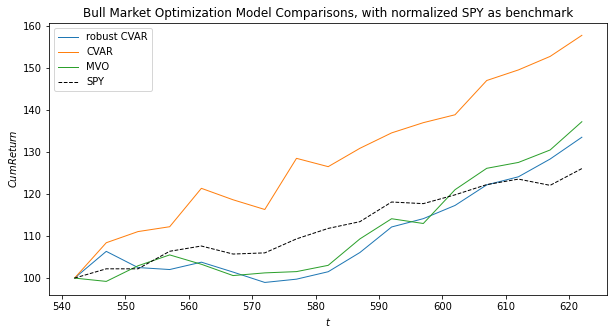

In [ ]:
# fig, ax = plt.subplots()
# loc = plticker.MultipleLocator(base=90) # this locator puts ticks at regular intervals
# ax.xaxis.set_major_locator(loc)
# # y = np.sin(x)
# ax.plot(date_list[:-2],np.asarray(cum_ret_act)*100-100)
# print(date_list)
# ax.set_xlabel('Date')
# ax.set_ylabel('Return (%)')
# ax.set_title('Cumulative Portfolio Return')
# ax.legend(['Cumulated Actual Return'])
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,5))
plt.plot(date_list[:-1], np.asarray(rCVAR_cum_ret_act)*100, linewidth=1)    #Using 95% VaR, 1000 times simulation, theta = 1.96
plt.plot(date_list[:-1], np.asarray(CVAR_cum_ret_act)*100, linewidth=1)     #Using 95% VaR, 1000 times simulation,
plt.plot(date_list[:-1], np.asarray(MVO_cum_ret_act)*100, linewidth=1)
plt.plot(date_list[:-1],np.asarray(SPY_act_return)*100, 'k--',linewidth = 1)    #Use SPY, a S&P 500 tracking ETF as benchmark
plt.plot(date_list[:-1], np.asarray(Sharpe_cum_ret_act)*100, linewidth=1)
plt.plot(date_list[:-1], np.asarray(RP_cum_ret_act)*100, linewidth=1)
plt.legend(['robust CVAR','CVAR','MVO','SPY'，'Sharpe','RiskParity'])
plt.xlabel('$t$')
plt.ylabel('$Cum Return$')
plt.title('Bull Market Optimization Model Comparisons, with normalized SPY as benchmark')
plt.show()

#All 2005-2020 Performance using back-tested model
As back-tested, best in Bear: Robust CVAR
                best in BULL: CVAR

In [13]:
from mvo import *
from mvo_cost import *
from cvar import *
from cvar_cost import *
from robust_cvar import *
from robust_cvar_cost import *
from max_sharpe import *
from max_sharpe_cost import *
from risk_parity import *
from risk_parity_cost import *

class optimization_test(object):
# card = 10
# regime_flag = 0
# regime_flag = 1
# model_flag = 0
# model_flag = 1
# model_flag = 2
# model_flag = 3
# model_flag = 4
# cost_flag = 0
# cost_flag = 1
# date = ['2010-10-15']
# price_table = df
  def cardinality (principal):
    if principal <= 10000:
      card = 5
    elif principal > 10000 and principal <= 100000:
      card = 10
    else: card = 12
    return card
  def choose_model (regime_flag):
    if regime_flag == 0:  #Robust CVaR for regime 0, bear market
      model_flag = 2
      cost_flag = 0    
    else:
      model_flag = 1    #CVaR for regime 1, bull market       
      cost_flag = 0
    return model_flag, cost_flag
  def get_weight (mu, Q, card, price_table, date, old_weight, old_ticker, model_flag, cost_flag):
    opt_model = [[mvo,mvo_cost],[cvar,cvar_cost],[robust_cvar,robust_cvar_cost],
                [max_sharpe, max_sharpe_cost],[risk_parity, risk_parity_cost]]
    if model_flag == 1 or model_flag == 2:
      if cost_flag == 0:
        weight, ticker_index = opt_model[model_flag][cost_flag](mu,Q,card,price_table,date)
      else:
        weight, ticker_index = opt_model[model_flag][cost_flag](mu,Q, card, price_table, date, old_weight, old_ticker)
    else:
      if cost_flag == 0:
        weight, ticker_index = opt_model[model_flag][cost_flag](mu,Q,card)
      else:
        weight, ticker_index = opt_model[model_flag][cost_flag](mu,Q, card, old_weight, old_ticker)
    return weight, ticker_index

  def multiperiod (factors_return, excess_return, df, lookback, principal,regimes):
    weight = []
    ticker_index = []
    mu_all = []
    card = optimization_test.cardinality(principal)
    #model_flag, cost_flag = optimization.choose_model(regime_flag)
    #print(len(factors_return))
    if len(factors_return) % lookback != 0:
      factors_return = factors_return[:-int(len(factors_return) % lookback)]
    #print(len(factors_return))
    for i in range(int(len(factors_return)/lookback)):
      regime_flag = regimes[lookback*(i+1)]
      model_flag, cost_flag = optimization_test.choose_model(regime_flag)
      mu, Q = factors_fit.generate_factor(factors_return[0:(i+1)*lookback],excess_return[0:(i+1)*lookback])
      #print(len(Q))
      if i == 0:
        old_weight = np.zeros(card)
        old_ticker = np.arange(card)
      else:
        old_weight = weight[i-1]
        old_ticker = ticker_index[i-1]
      mu_all.append(mu)
      weight.append(optimization_test.get_weight(mu,Q,card, df, df.columns.values[(i+1)*lookback], old_weight, old_ticker, model_flag, cost_flag)[0])
      ticker_index.append(optimization_test.get_weight(mu,Q,card, df, df.columns.values[(i+1)*lookback], old_weight, old_ticker, model_flag, cost_flag)[1])
      print(i," in ",int(len(factors_return)/lookback), " done, which is ", i/(int(len(factors_return)/lookback)),"done")
    return mu_all, weight, ticker_index

  def get_port_info (mu,Q,weight,ticker,date_list):
    all_weight = []
    all_ticker = []
    all_exp_return = []
    all_actual_return = []
    all_port_exp_ret = []
    all_port_act_ret = []
    for i in range(len(date_list)-2):
      cur_date = df.columns.values[date_list[i]]
      # exp_return = mu[ticker[i]]
      exp_return = mu[i][ticker[i]]
      actual_return = df.iloc[ticker[i],date_list[i+2]].values/df.iloc[ticker[i],date_list[i+1]].values
      port_exp_return = lookback*sum(weight[i]*exp_return)
      port_actual_return = sum(weight[i]*actual_return)-1
      all_weight.append(weight[i])
      all_ticker.append(ticker[i])
      all_exp_return.append(exp_return)
      all_actual_return.append(actual_return)
      all_port_exp_ret.append(port_exp_return)
      all_port_act_ret.append(port_actual_return)
    return all_weight, all_ticker, all_exp_return, all_actual_return, all_port_exp_ret, all_port_act_ret

  ### Calculate expected and actual cumulative return
  def cum_return (port_ret):
    cal_ret_list = []
    cum_ret_list = []
    for i in range(len(port_ret)):
      cal_ret_list.append(port_ret[i]+1)
    ret = 1
    for num in cal_ret_list:
      ret = ret*num
      cum_ret_list.append(ret)
    return cum_ret_list

  # calculate the mean difference between actual and expected return
  def mean_diff (act_ret,exp_ret):
    diff_list = np.asarray(act_ret) - np.asarray(exp_ret)
    return diff_list.mean()

  def sharpe_ratio (act_ret,exp_ret,rf):
    act_std = np.std(act_ret)
    exp_std = np.std(exp_ret)
    act_sr = (np.subtract(act_ret,rf))/act_std
    exp_sr = (np.subtract(exp_ret,rf))/exp_std
    return act_sr, exp_sr

  def get_cum_ret(date_list,lookback, regimes):
    cost_flag = 0
    mu_all, w, t = optimization_test.multiperiod (factors_return, excess_return, df=price_table, lookback = lookback, principal = 20000,regimes = regimes)
    #print(mu_all[1][t[1]])
    all_weight, all_ticker, all_exp_return, all_actual_return, all_port_exp_ret, all_port_act_ret = optimization_test.get_port_info (mu=mu_all,Q=None,weight=w,ticker=t,date_list=date_list)
    # mu_all[0][ticker[1]]
    # print(all_port_act_ret)
    cum_ret_exp = optimization_test.cum_return(all_port_exp_ret)
    cum_ret_act = optimization_test.cum_return(all_port_act_ret)
    return cum_ret_exp,cum_ret_act

In [14]:
lookback = 50
df = price_table
date_list = np.arange(0,751,lookback)
portfolio_exp_ret,portfolio_act_ret=optimization_test.get_cum_ret(date_list,lookback, regimes)
# print("Robust CVAR DONE")
# CVAR_cum_ret_exp,CVAR_cum_ret_act=optimization_test.get_cum_ret(date_list,lookback, regimes)
# print("CVAR DONE")
# MVO_cum_ret_exp,MVO_cum_ret_act=optimization_test.get_cum_ret(date_list,lookback, regimes)
# print("MVO DONE")

0  in  15  done, which is  0.0 done
1  in  15  done, which is  0.06666666666666667 done
2  in  15  done, which is  0.13333333333333333 done
3  in  15  done, which is  0.2 done
4  in  15  done, which is  0.26666666666666666 done
5  in  15  done, which is  0.3333333333333333 done
6  in  15  done, which is  0.4 done
7  in  15  done, which is  0.4666666666666667 done
8  in  15  done, which is  0.5333333333333333 done
9  in  15  done, which is  0.6 done
10  in  15  done, which is  0.6666666666666666 done
11  in  15  done, which is  0.7333333333333333 done
12  in  15  done, which is  0.8 done
13  in  15  done, which is  0.8666666666666667 done
14  in  15  done, which is  0.9333333333333333 done


In [15]:
#If always using CVaR:
regimes = [1]*3776
cvar_portfolio_exp_ret,cvar_portfolio_act_ret=optimization_test.get_cum_ret(date_list,lookback, regimes)


0  in  15  done, which is  0.0 done
1  in  15  done, which is  0.06666666666666667 done
2  in  15  done, which is  0.13333333333333333 done
3  in  15  done, which is  0.2 done
4  in  15  done, which is  0.26666666666666666 done
5  in  15  done, which is  0.3333333333333333 done
6  in  15  done, which is  0.4 done
7  in  15  done, which is  0.4666666666666667 done
8  in  15  done, which is  0.5333333333333333 done
9  in  15  done, which is  0.6 done
10  in  15  done, which is  0.6666666666666666 done
11  in  15  done, which is  0.7333333333333333 done
12  in  15  done, which is  0.8 done
13  in  15  done, which is  0.8666666666666667 done
14  in  15  done, which is  0.9333333333333333 done


In [16]:
#If always using Robust CVaR:
regimes = [0]*3776
rcvar_portfolio_exp_ret,rcvar_portfolio_act_ret=optimization_test.get_cum_ret(date_list,lookback, regimes)


0  in  15  done, which is  0.0 done
1  in  15  done, which is  0.06666666666666667 done
2  in  15  done, which is  0.13333333333333333 done
3  in  15  done, which is  0.2 done
4  in  15  done, which is  0.26666666666666666 done
5  in  15  done, which is  0.3333333333333333 done
6  in  15  done, which is  0.4 done
7  in  15  done, which is  0.4666666666666667 done
8  in  15  done, which is  0.5333333333333333 done
9  in  15  done, which is  0.6 done
10  in  15  done, which is  0.6666666666666666 done
11  in  15  done, which is  0.7333333333333333 done
12  in  15  done, which is  0.8 done
13  in  15  done, which is  0.8666666666666667 done
14  in  15  done, which is  0.9333333333333333 done


In [17]:
portfolio_exp_ret.insert(0,1)
portfolio_act_ret.insert(0,1)


In [18]:
cvar_portfolio_act_ret.insert(0,1)
rcvar_portfolio_act_ret.insert(0,1)

In [19]:

import yfinance as yf
start_date = '2005-09-30'
end_date = '2020-09-30'
data = yf.download("SPY", start=start_date, end=end_date)
print(data[:]['Adj Close'])
SPY_price = data[:]['Adj Close']
SPY_price = SPY_price[0:len(SPY_price):250]
SPY_return = SPY_price.pct_change().dropna()
SPY_return = SPY_return.values.tolist()
SPY_act_return = []
base = 1
for i in range(len(SPY_return)):
  if i == 0:
    SPY_act_return.append(base)
  else:
    SPY_act_return.append(SPY_act_return[i-1]*(1+SPY_return[i]))

[*********************100%***********************]  1 of 1 completed
Date
2005-09-30     90.895706
2005-10-03     90.570633
2005-10-04     89.551186
2005-10-05     88.376595
2005-10-06     88.058876
                 ...    
2020-09-23    322.640015
2020-09-24    323.500000
2020-09-25    328.730011
2020-09-28    334.190002
2020-09-29    332.369995
Name: Adj Close, Length: 3775, dtype: float64


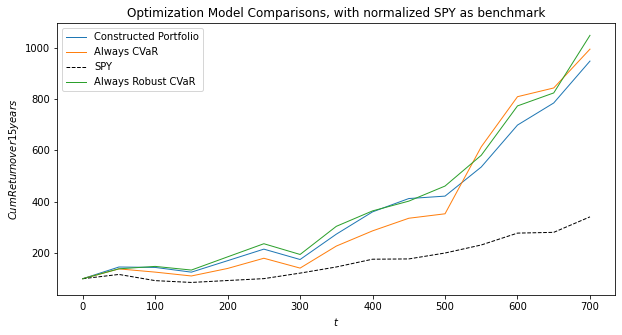

In [20]:
# fig, ax = plt.subplots()
# loc = plticker.MultipleLocator(base=90) # this locator puts ticks at regular intervals
# ax.xaxis.set_major_locator(loc)
# # y = np.sin(x)
# ax.plot(date_list[:-2],np.asarray(cum_ret_act)*100-100)
# print(date_list)
# ax.set_xlabel('Date')
# ax.set_ylabel('Return (%)')
# ax.set_title('Cumulative Portfolio Return')
# ax.legend(['Cumulated Actual Return'])
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,5))
plt.plot(date_list[:-1], np.asarray(portfolio_act_ret[:])*100, linewidth=1)    #Using 95% VaR, 1000 times simulation, theta = 1.96
plt.plot(date_list[:-1], np.asarray(cvar_portfolio_act_ret)*100, linewidth=1)
# plt.plot(date_list[:-1], np.asarray(CVAR_cum_ret_act)*100, linewidth=1)     #Using 95% VaR, 1000 times simulation,
# plt.plot(date_list[:-1], np.asarray(MVO_cum_ret_act)*100, linewidth=1)
plt.plot(date_list[:-1],np.asarray(SPY_act_return)*100, 'k--',linewidth = 1)    #Use SPY, a S&P 500 tracking ETF as benchmark
plt.plot(date_list[:-1], np.asarray(rcvar_portfolio_act_ret)*100, linewidth=1)
#plt.plot(date_list[:-1], np.asarray(Sharpe_cum_ret_act)*100, linewidth=1)
#plt.plot(date_list[:-1], np.asarray(RP_cum_ret_act)*100, linewidth=1)
plt.legend(['Constructed Portfolio','Always CVaR','SPY','Always Robust CVaR'])
plt.xlabel('$t$')
plt.ylabel('$Cum Return over 15 years$')
plt.title('Optimization Model Comparisons, with normalized SPY as benchmark')
plt.show()

#Adhoc

In [ ]:
all_weight, all_ticker, all_exp_return, all_actual_return, all_port_exp_ret, all_port_act_ret = get_port_info (mu=mu_all,Q=None,weight=w,ticker=t,date_list=date_list)
# mu_all[0][ticker[1]]
# print(all_port_act_ret)
cum_ret_exp = cum_return(all_port_exp_ret)
cum_ret_act = cum_return(all_port_act_ret)
# act_sr, exp_sr = sharpe_ratio (all_port_act_ret,all_port_exp_ret,rf=0.02)

IndexError: ignored

In [ ]:
### Plot weight distribution as pie chart
%matplotlib inline
import matplotlib.pyplot as plt
def plot_pie(weight, ticker):
  labels = df.index.values[ticker]

  sizes = weight

  # Creating plot 
  # fig, (ax1, ax2) = plt.subplots(1, 2)
  # fig.suptitle('portfolio weight')
  # ax1.pie(sizes_mvo, labels = labels_mvo) 
  # ax2.pie(sizes_cvar, labels = labels_cvar)
  # ax1.title.set_text('MVO')
  # ax2.title.set_text('CVaR')
  explode = (0, 0.1, 0, 0, 0, 0, 0, 0, 0, 0,0,0,0,0,0)  # only "explode" the 2nd slice (i.e. 'Hogs')

  fig1, ax1 = plt.subplots()
  ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
          shadow=True, startangle=90)
  ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

  plt.show()

### Plot acutal and expected return
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker
def backtest_plot (date_list, all_port_act_ret, all_port_exp_ret):
  fig, ax = plt.subplots()
  loc = plticker.MultipleLocator(base=90) # this locator puts ticks at regular intervals
  ax.xaxis.set_major_locator(loc)
  ax.plot(date_list[:-3],all_port_act_ret[:-1],date_list[:-3],all_port_exp_ret[:-1],'b')
  # ax.set_xticklabels(['2010','2010','2012','2014','2016','2018','2020'])
  ax.set_xlabel('Date')
  ax.set_ylabel('Return(%)')
  ax.set_title('Backtesting of Portfolio Return')
  ax.legend(['Actual Return','Expected Return'])

### Plot cumulative portfolio return
%matplotlib inline
import matplotlib.pyplot as plt
def cum_plot (date_list, cum_ret_exp, cum_ret_act):
  fig, ax = plt.subplots()
  loc = plticker.MultipleLocator(base=90) # this locator puts ticks at regular intervals
  ax.xaxis.set_major_locator(loc)
  # y = np.sin(x)
  ax.plot(date_list[:-2],np.asarray(cum_ret_exp)*100-100,date_list[:-2],np.asarray(cum_ret_act)*100-100)
  ax.set_xlabel('Date')
  ax.set_ylabel('Return (%)')
  ax.set_title('Cumulative Portfolio Return')
  ax.legend(['Cumulated Expected Return','Cumulated Actual Return'])
  # ax.set_xticklabels(['2010','2010','2012','2014', '2016','2018','2020'])

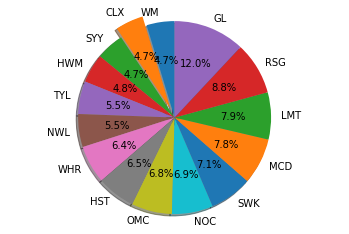

In [ ]:
plot_pie(w[1],t[1]) # mvo around 20s with 16 lookback

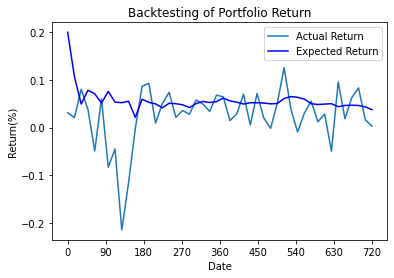

In [ ]:
backtest_plot(date_list,all_port_act_ret,all_port_exp_ret) # mvo

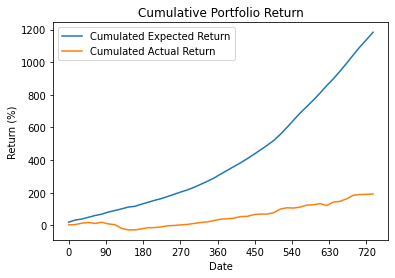

In [ ]:
cum_plot(date_list, cum_ret_exp, cum_ret_act) # mvo

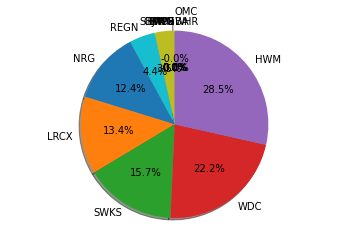

In [ ]:
plot_pie(w[1],t[1]) # mvo_cost around 25s with 16 lookback

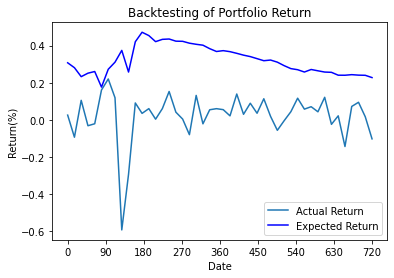

In [ ]:
backtest_plot(date_list,all_port_act_ret,all_port_exp_ret) # mvo_cost

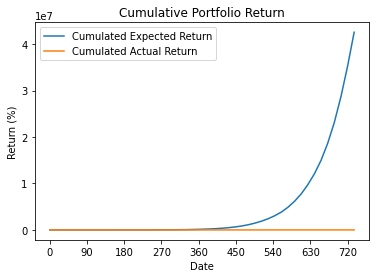

In [ ]:
cum_plot(date_list, cum_ret_exp, cum_ret_act) # mvo_cost

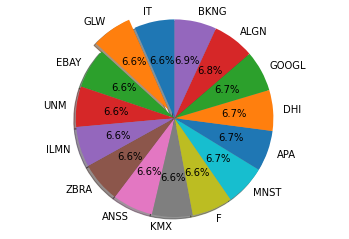

In [ ]:
plot_pie(w[1],t[1]) # cvar around 50s with 16 lookback

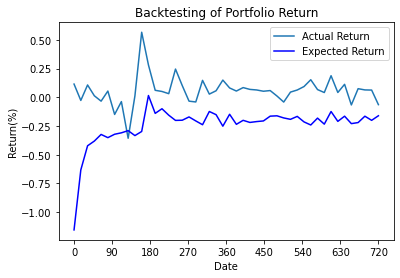

In [ ]:
backtest_plot(date_list,all_port_act_ret,all_port_exp_ret) # cvar

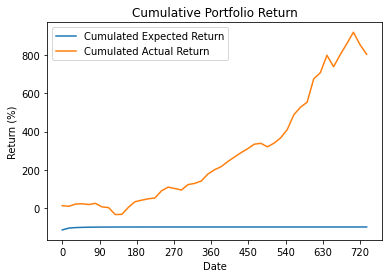

In [ ]:
cum_plot(date_list, cum_ret_exp, cum_ret_act) # cvar

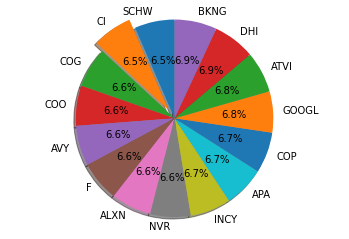

In [ ]:
plot_pie(w[1],t[1]) # cvar_cost around 300s with 16 lookback

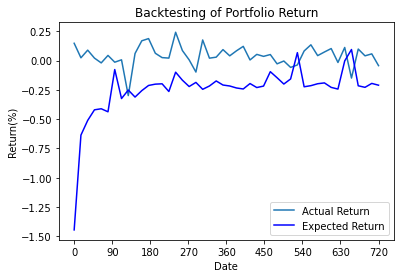

In [ ]:
backtest_plot(date_list,all_port_act_ret,all_port_exp_ret) # cvar_cost

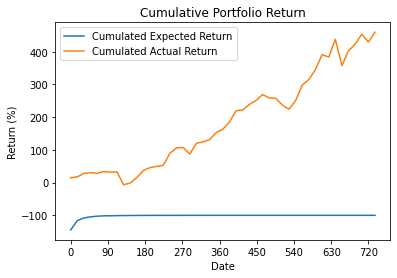

In [ ]:
cum_plot(date_list, cum_ret_exp, cum_ret_act) # cvar_cost

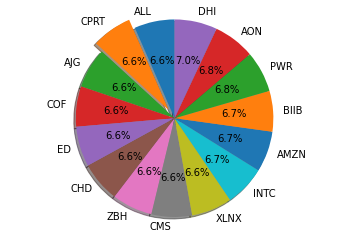

In [ ]:
plot_pie(w[1],t[1]) # robust_cvar around 50s with 16 lookback

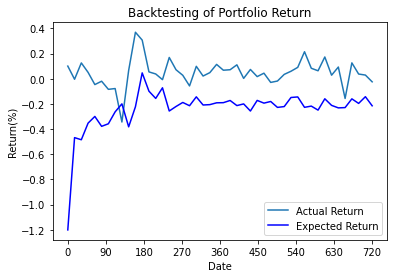

In [ ]:
backtest_plot(date_list,all_port_act_ret,all_port_exp_ret) # robust_cvar

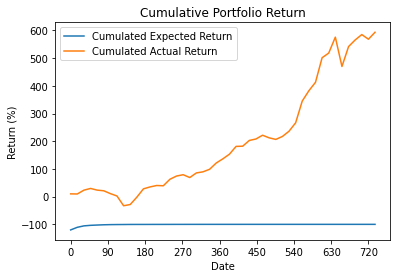

In [ ]:
cum_plot(date_list, cum_ret_exp, cum_ret_act) # robust_cvar

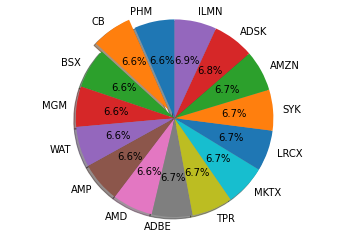

In [ ]:
plot_pie(w[1],t[1]) # robust_cvar_cost around 300s with 16 lookback

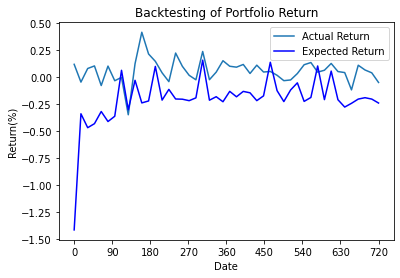

In [ ]:
backtest_plot(date_list,all_port_act_ret,all_port_exp_ret) # robust_cvar_cost

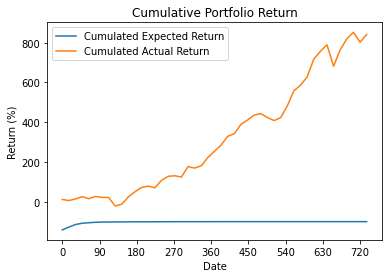

In [ ]:
cum_plot(date_list, cum_ret_exp, cum_ret_act) # robust_cvar_cost

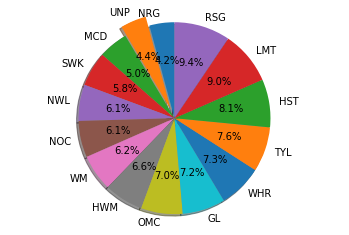

In [ ]:
plot_pie(w[1],t[1]) # max_sharpe around 3590s with 16 lookback

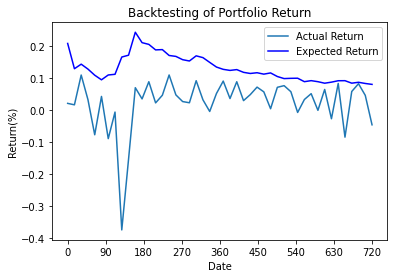

In [ ]:
backtest_plot(date_list,all_port_act_ret,all_port_exp_ret) # max_sharpe

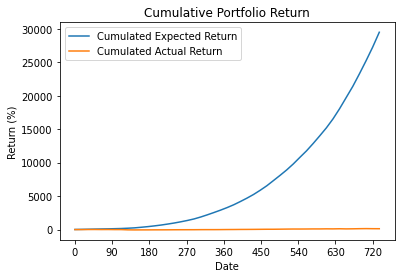

In [ ]:
cum_plot(date_list, cum_ret_exp, cum_ret_act) # max_sharpe